In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


C:\Users\Shardul\AppData\Local\Temp\ipykernel_27736\1330392595.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
C:\Users\Shardul\AppData\Local\Temp\ipykernel_27736\1330392595.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [4]:
# Part 1
# Calculate GDP per capita (GDP divided by Population)
dfLE['GDP_per_capita'] = dfLE['GDP'] / dfLE['Population']

# Show the labels along with just that column
print("GDP per Capita column:")
print(dfLE[['Country', 'GDP_per_capita']].head())

# Print 10 random rows of that data
print("\n10 random rows of GDP per capita data:")
print(dfLE[['Country', 'GDP_per_capita']].sample(10, random_state=42))

GDP per Capita column:
             Country  GDP_per_capita
0        Afghanistan      414.824126
1            Albania     1674.441147
2            Algeria     3392.912329
3             Angola     2146.263722
4  AntiguaandBarbuda             NaN

10 random rows of GDP per capita data:
        Country  GDP_per_capita
152   Singapore             NaN
75      Iceland    33467.123454
158  SouthSudan      511.630928
66       Greece    24099.375234
60       France    27857.422247
15      Belgium     7893.231084
9    Azerbaijan     3091.580405
16       Belize     4243.835642
128      Panama     7084.512422
125        Oman             NaN


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>


=== PART 2: DISTRIBUTION VISUALIZATIONS ===
Numeric columns to plot: ['isDeveloped', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDP_per_capita']
Creating 4 rows x 4 columns grid for 15 variables
Creating density distribution plots...
Plotted distribution for isDeveloped
Plotted distribution for Lifeexpectancy
Plotted distribution for AdultMortality
Plotted distribution for infantdeaths
Plotted distribution for Alcohol
Plotted distribution for HepatitisB
Plotted distribution for Measles
Plotted distribution for BMI
Plotted distribution for under-fivedeaths
Plotted distribution for Polio
Plotted distribution for Diphtheria
Plotted distribution for GDP
Plotted distribution for Population
Plotted distribution for Schooling
Plotted distribution for GDP_per_capita


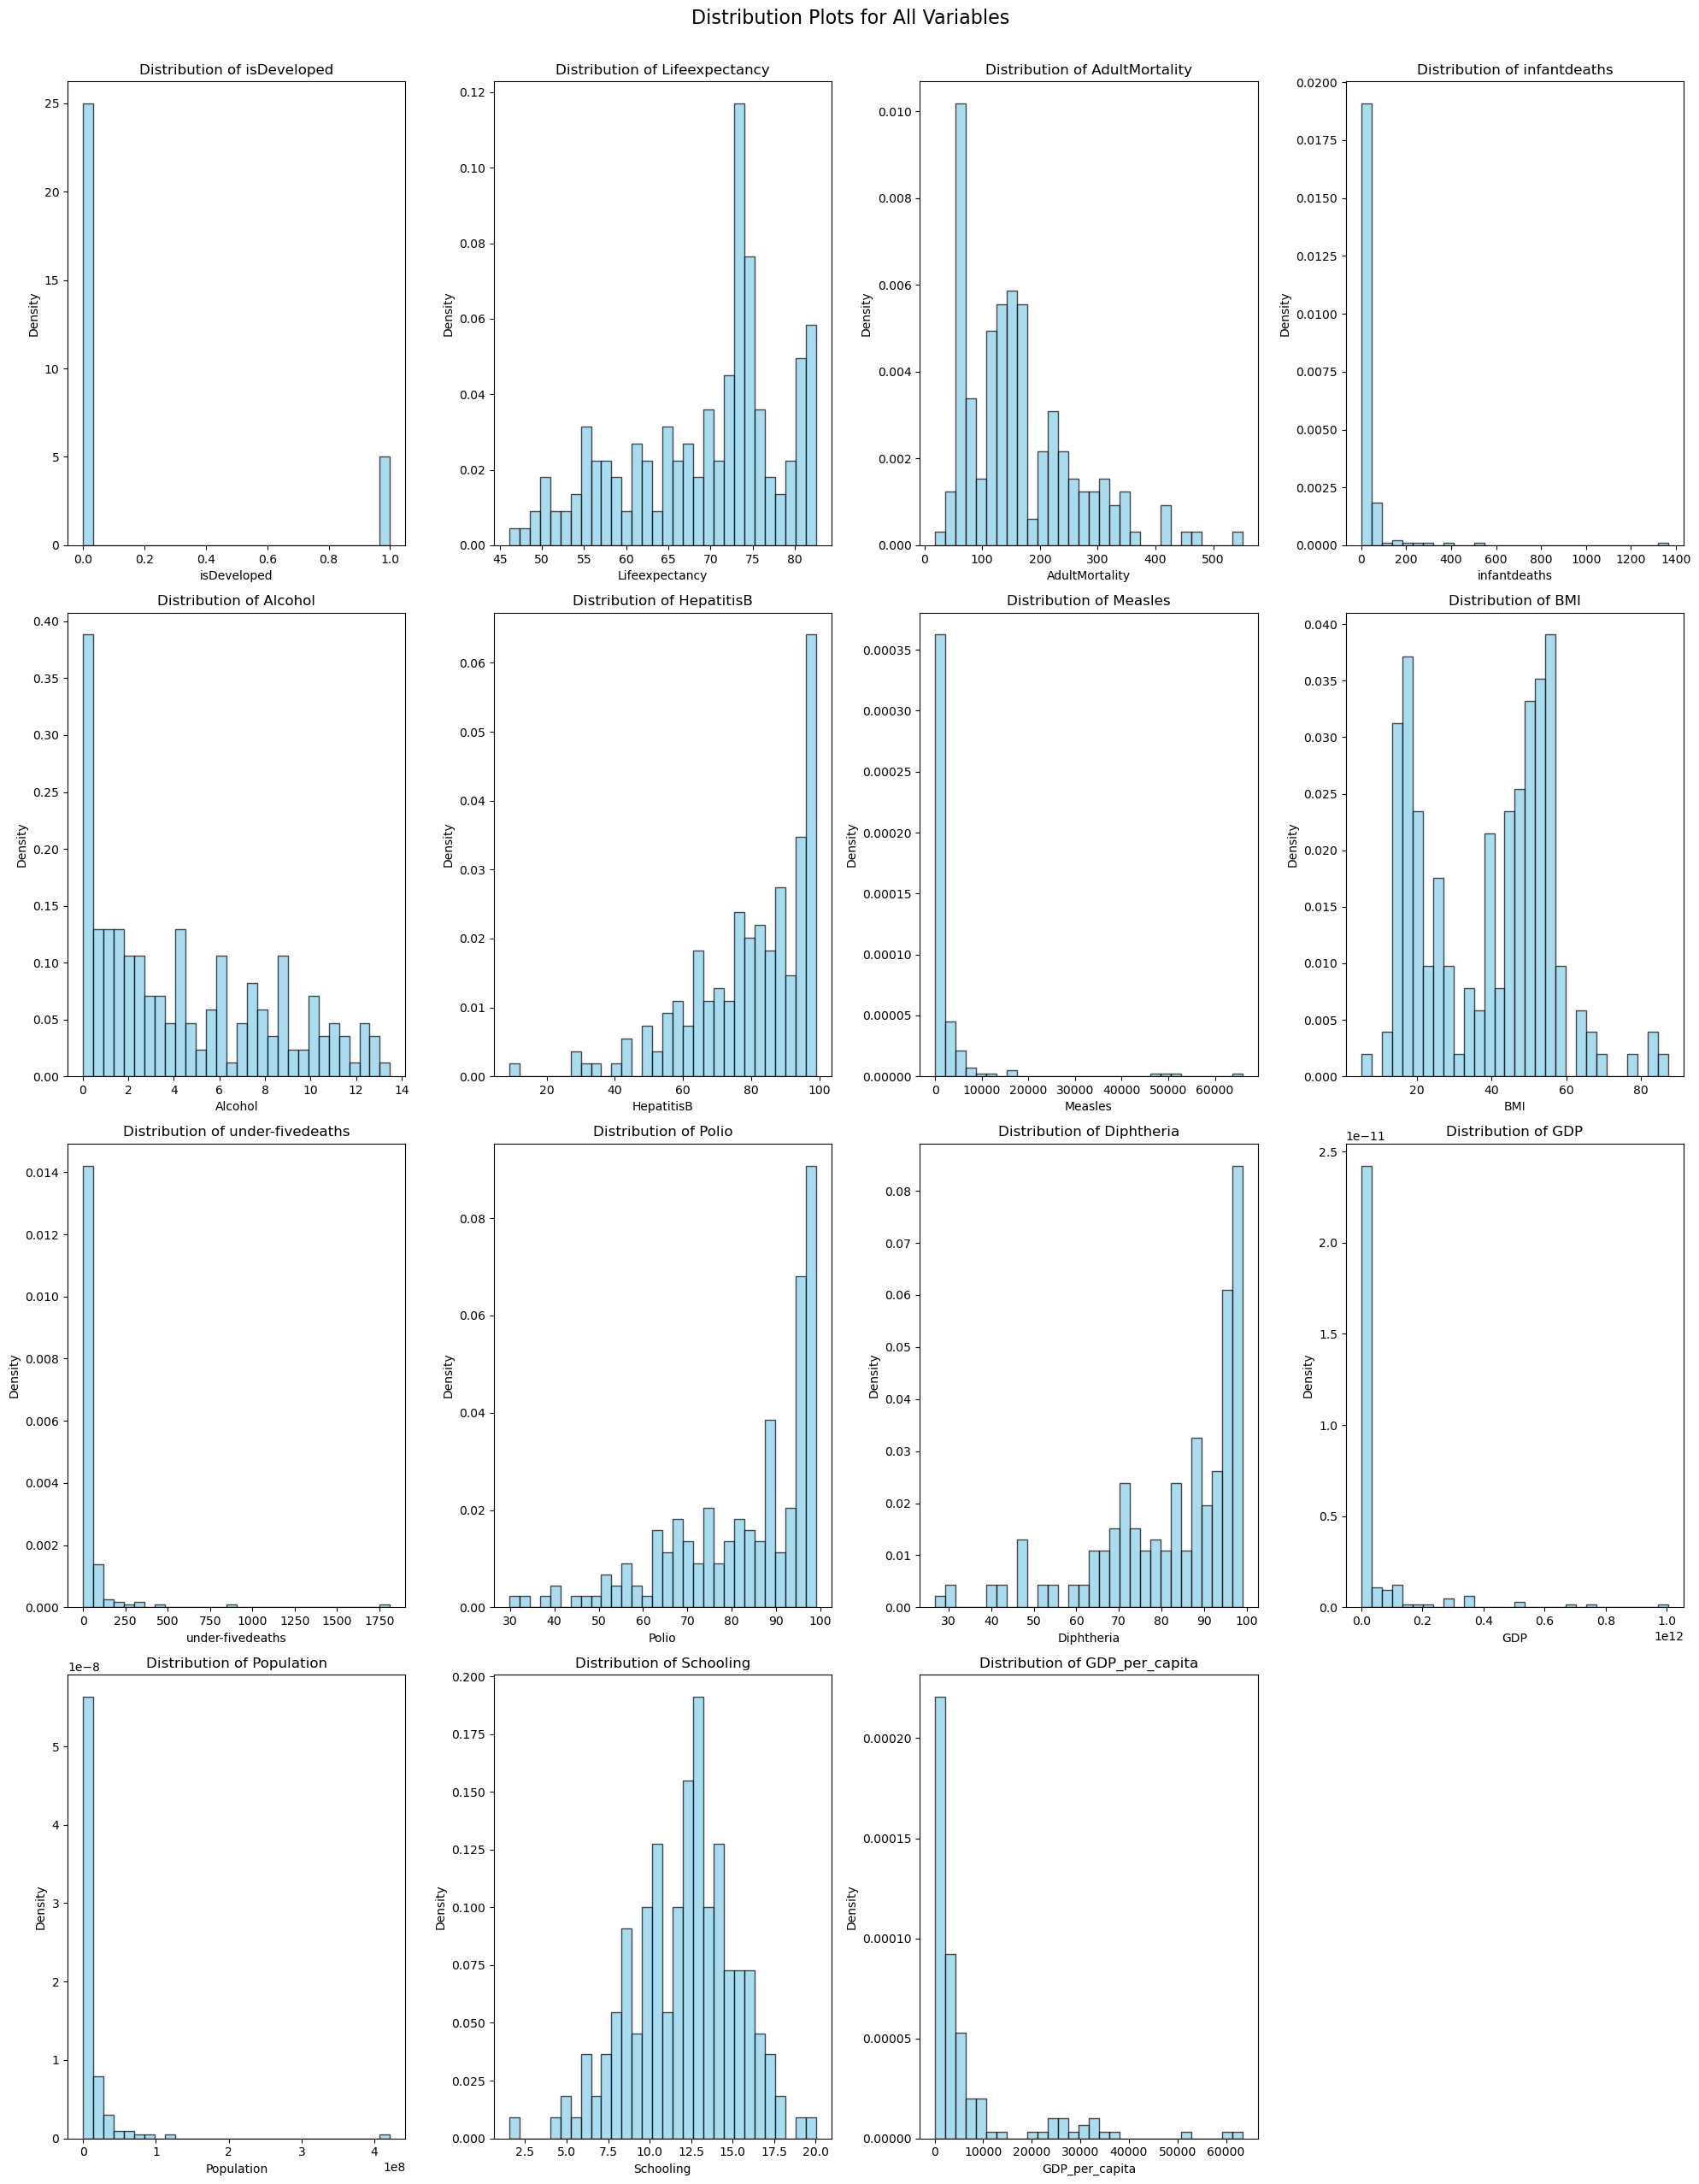


Creating cumulative distribution plots...
Plotted CDF for isDeveloped
Plotted CDF for Lifeexpectancy
Plotted CDF for AdultMortality
Plotted CDF for infantdeaths
Plotted CDF for Alcohol
Plotted CDF for HepatitisB
Plotted CDF for Measles
Plotted CDF for BMI
Plotted CDF for under-fivedeaths
Plotted CDF for Polio
Plotted CDF for Diphtheria
Plotted CDF for GDP
Plotted CDF for Population
Plotted CDF for Schooling
Plotted CDF for GDP_per_capita


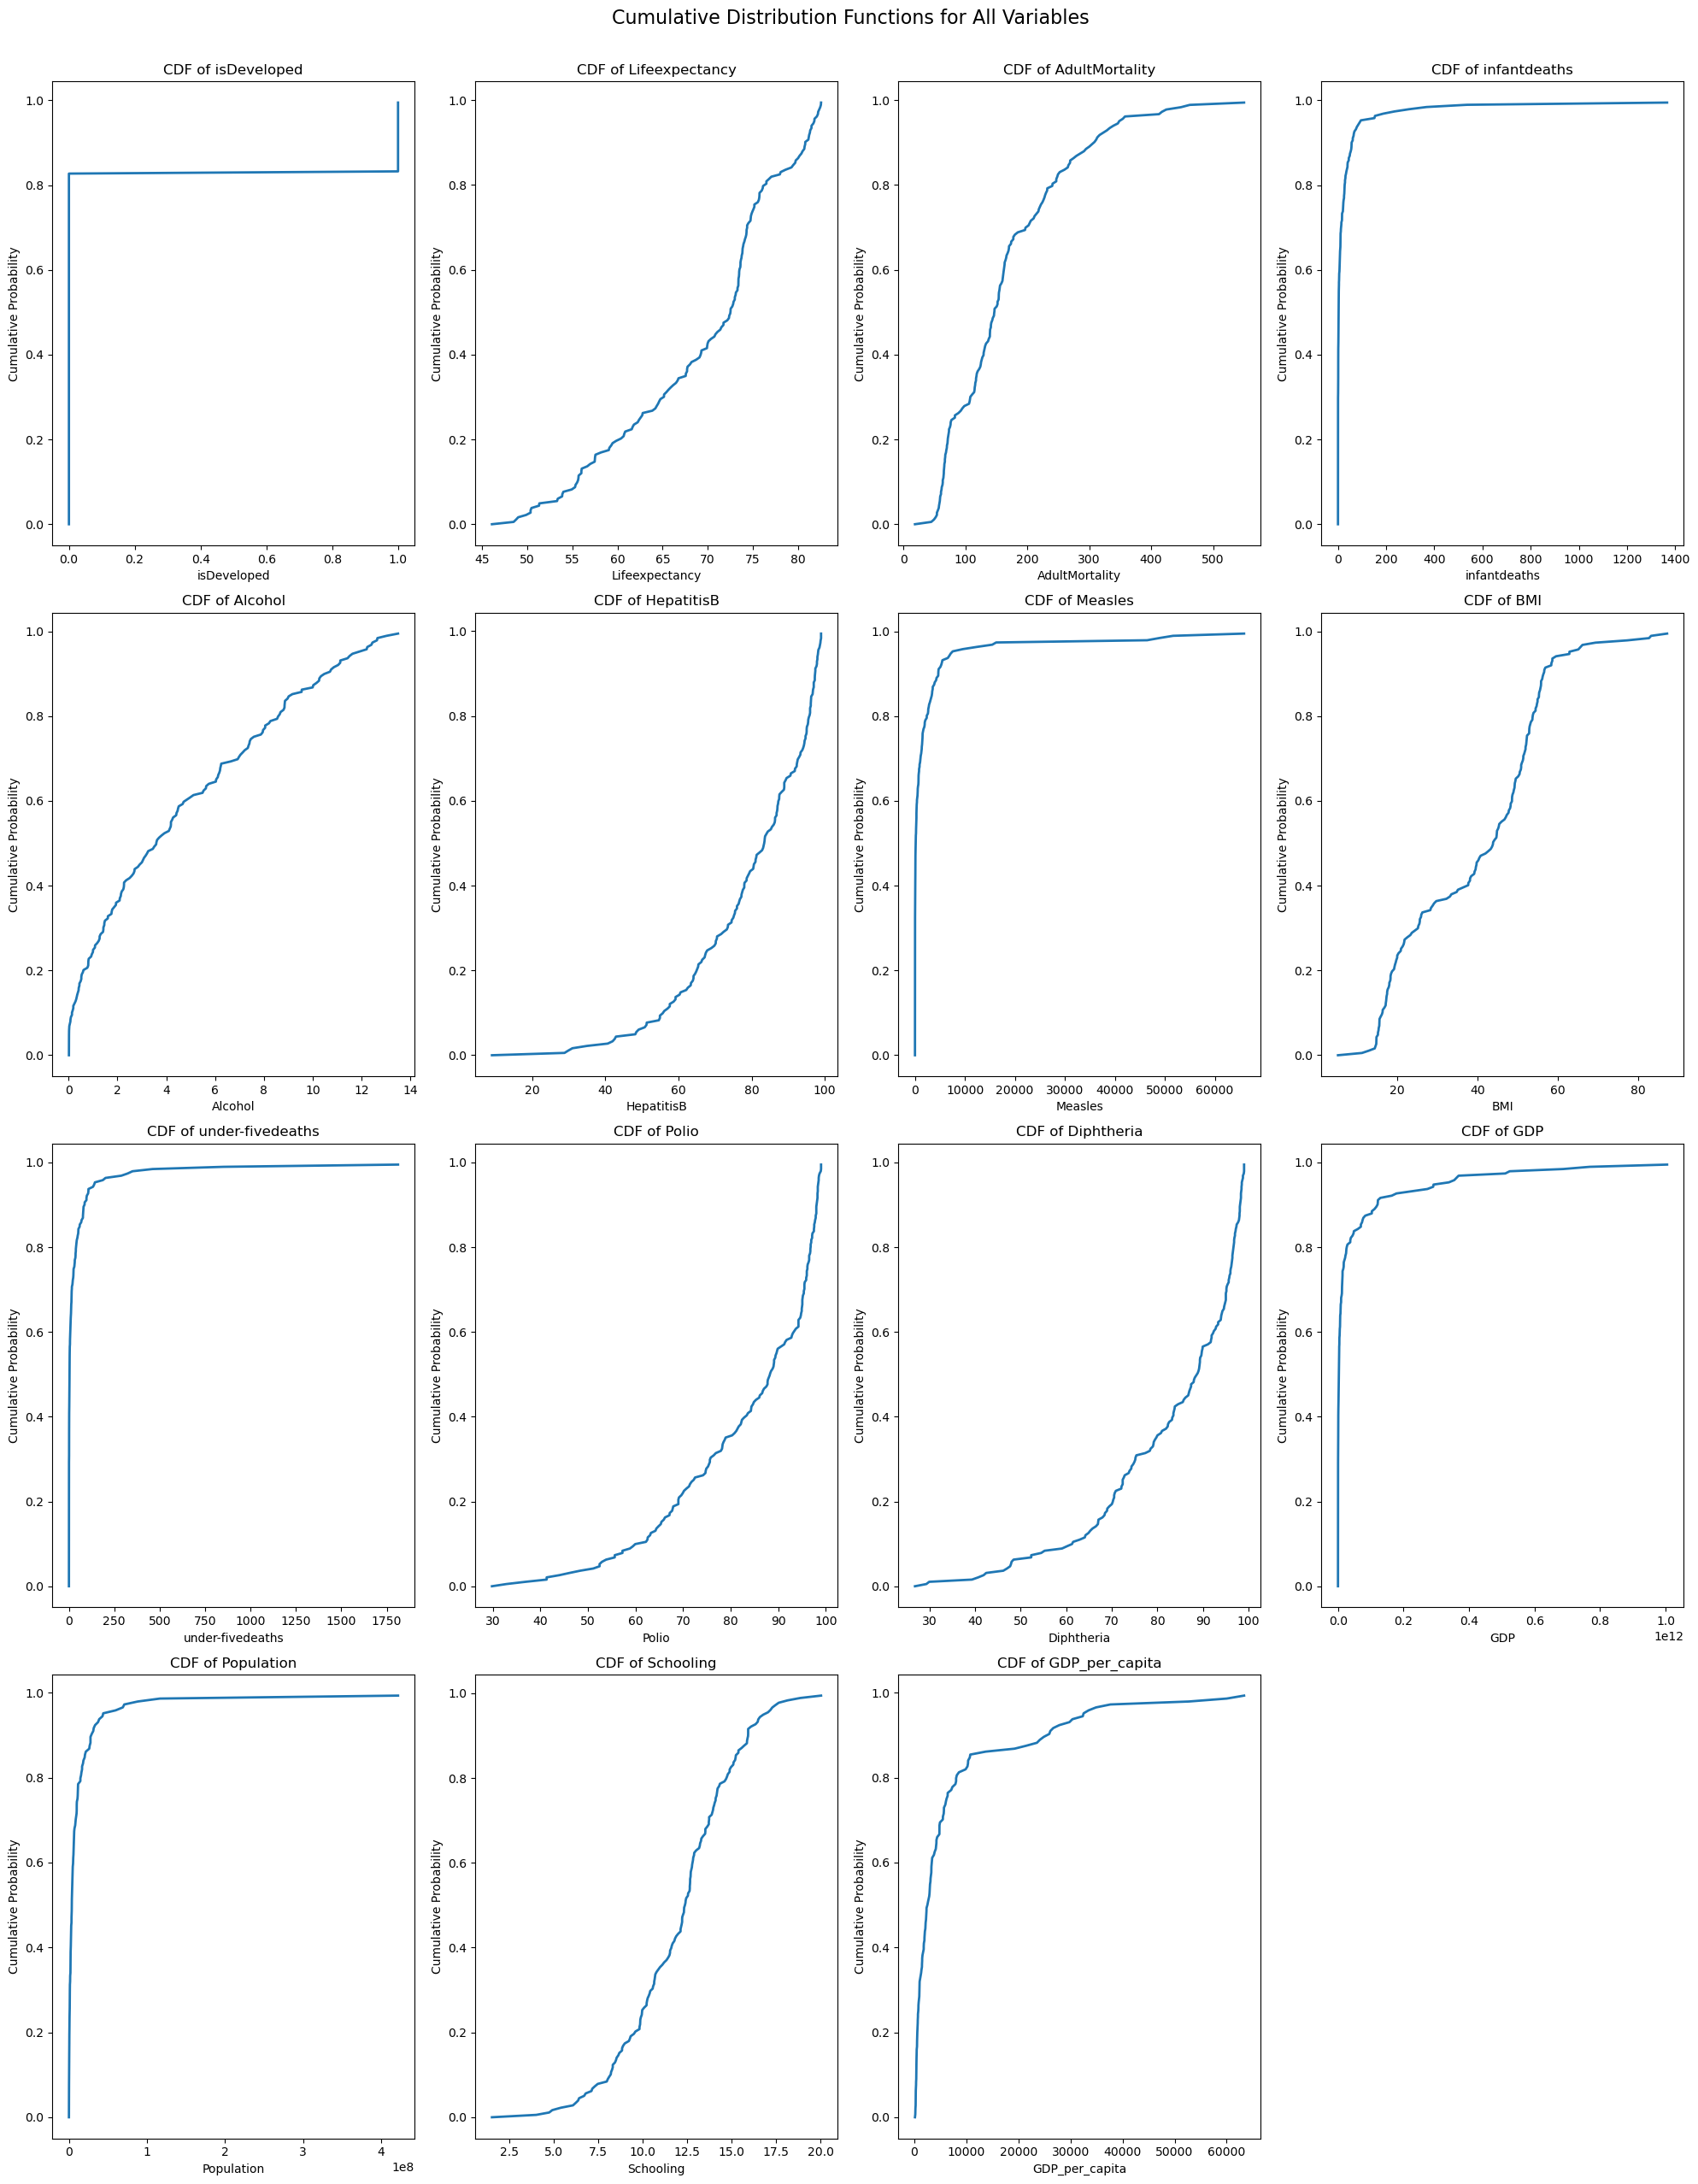

In [5]:
#Print all distributions

print("\n=== PART 2: DISTRIBUTION VISUALIZATIONS ===")

# Get numeric columns only (excluding Country since it's text)
# select_dtypes(include=[np.number]) selects only columns with numeric data
numeric_cols = dfLE.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns to plot: {numeric_cols}")

# Set up the plotting grid - we'll create multiple subplots
# Calculate how many rows we need based on number of columns we want per row
n_cols = 4  # 4 charts per row
n_rows = math.ceil(len(numeric_cols) / n_cols)  # Calculate rows needed

print(f"Creating {n_rows} rows x {n_cols} columns grid for {len(numeric_cols)} variables")

# Create subplots for regular distributions (density plots)
# figsize=(20, 25) makes the figure 20 inches wide and 25 inches tall
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
axes = axes.flatten()  # Convert 2D array of axes to 1D for easier indexing

print("Creating density distribution plots...")
for i, col in enumerate(numeric_cols):
    # Skip if no data or all NaN in this column
    if dfLE[col].notna().sum() == 0:
        print(f"Skipping {col} - no data")
        continue
        
    # Regular distribution (density) using histogram
    # density=True normalizes the histogram so area under curve = 1
    # bins=30 creates 30 bars in the histogram
    # alpha=0.7 makes bars semi-transparent
    axes[i].hist(dfLE[col].dropna(), bins=30, density=True, alpha=0.7, 
                color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    print(f"Plotted distribution for {col}")

# Remove empty subplots (if we have more subplot spaces than variables)
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])  # Delete unused axes

plt.tight_layout()  # Adjust spacing between subplots
plt.suptitle('Distribution Plots for All Variables', y=1.02, fontsize=16)
plt.show()

# Create subplots for cumulative distributions (CDFs)
print("\nCreating cumulative distribution plots...")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Skip if no data or all NaN
    if dfLE[col].notna().sum() == 0:
        continue
        
    # Cumulative distribution function (CDF)
    # Step 1: Sort the data
    data_sorted = np.sort(dfLE[col].dropna())
    # Step 2: Create y-values from 0 to 1 representing cumulative probability
    yvals = np.arange(len(data_sorted)) / float(len(data_sorted))
    # Step 3: Plot the CDF
    axes[i].plot(data_sorted, yvals, linewidth=2)
    axes[i].set_title(f'CDF of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Cumulative Probability')
    print(f"Plotted CDF for {col}")

# Remove empty subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Cumulative Distribution Functions for All Variables', y=1.02, fontsize=16)
plt.show()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>


=== PART 3: ANALYTICAL DISTRIBUTION FOR SCHOOLING ===
Distribution Choice: Normal Distribution
Reason: Schooling represents years of education, which typically follows a normal distribution in large populations
Schooling data: 178 countries with valid data
Schooling Statistics:
  Mean (μ): 12.03 years
  Standard Deviation (σ): 3.10 years
  Min: 1.53 years, Max: 20.04 years


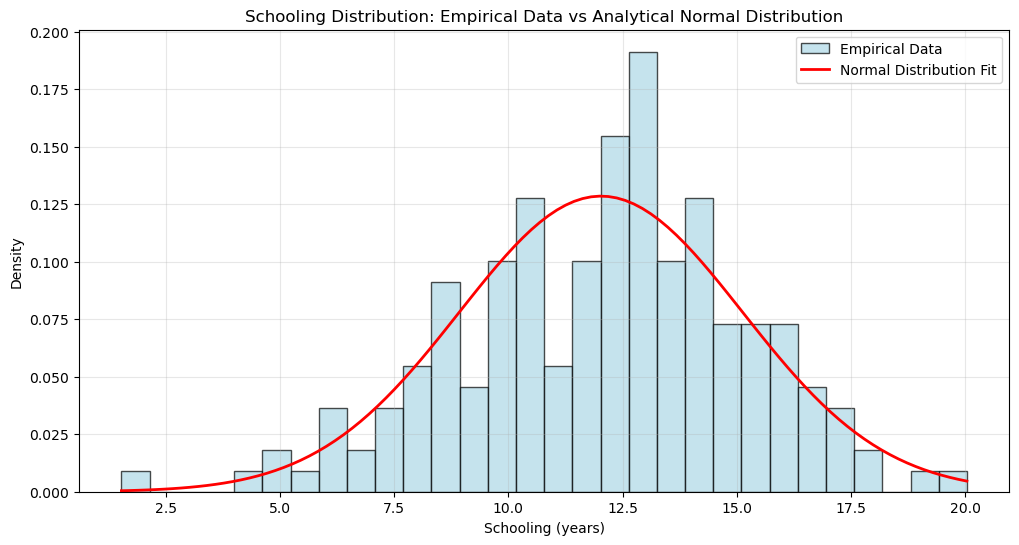


Using distribution for prediction:
Canada's schooling level: 15.88 years
Range: 14.88 to 16.88 years
Probability calculation:
  CDF(16.88) = 0.941
  CDF(14.88) = 0.820
  Difference = 0.120
Percentage of countries with schooling within 1 year of Canada: 12.03%


In [6]:
#Analytical for Schooling

print("\n=== PART 3: ANALYTICAL DISTRIBUTION FOR SCHOOLING ===")

# Choose normal distribution for schooling because:
# 1. Schooling is a continuous variable
# 2. Educational attainment often follows a bell-shaped curve in populations
# 3. It's bounded on both ends (0 years to ~20+ years)
print("Distribution Choice: Normal Distribution")
print("Reason: Schooling represents years of education, which typically follows a normal distribution in large populations")

# Get schooling data and remove missing values
schooling_data = dfLE['Schooling'].dropna()
print(f"Schooling data: {len(schooling_data)} countries with valid data")

# Calculate parameters for normal distribution MANUALLY (without using fit())
# For normal distribution, we need mean (μ) and standard deviation (σ)
mu_schooling = schooling_data.mean()    # μ (mean) - center of distribution
sigma_schooling = schooling_data.std()  # σ (standard deviation) - spread of distribution

print(f"Schooling Statistics:")
print(f"  Mean (μ): {mu_schooling:.2f} years")
print(f"  Standard Deviation (σ): {sigma_schooling:.2f} years")
print(f"  Min: {schooling_data.min():.2f} years, Max: {schooling_data.max():.2f} years")

# Create analytical normal distribution using scipy.stats
# ss.norm creates a normal distribution with specified mean and standard deviation
analytical_schooling = ss.norm(loc=mu_schooling, scale=sigma_schooling)

# Plot empirical vs analytical distributions
plt.figure(figsize=(12, 6))

# Plot empirical data (actual data from dataset)
# This shows what the real distribution looks like
plt.hist(schooling_data, bins=30, density=True, alpha=0.7, 
         color='lightblue', label='Empirical Data', edgecolor='black')

# Plot analytical PDF (Probability Density Function)
# This shows what our theoretical normal distribution predicts
x = np.linspace(schooling_data.min(), schooling_data.max(), 100)  # 100 points from min to max
plt.plot(x, analytical_schooling.pdf(x), 'r-', linewidth=2, label='Normal Distribution Fit')

plt.xlabel('Schooling (years)')
plt.ylabel('Density')
plt.title('Schooling Distribution: Empirical Data vs Analytical Normal Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Use the distribution to predict percentage of countries within 1 year of Canada's schooling level
print("\nUsing distribution for prediction:")
# First, find Canada's schooling level
canada_schooling = dfLE[dfLE['Country'] == 'Canada']['Schooling'].values[0]
print(f"Canada's schooling level: {canada_schooling:.2f} years")

# Define the range: within 1 year of Canada's level
lower_bound = canada_schooling - 1
upper_bound = canada_schooling + 1
print(f"Range: {lower_bound:.2f} to {upper_bound:.2f} years")

# Calculate probability using Cumulative Distribution Function (CDF)
# CDF(upper_bound) gives P(X ≤ upper_bound)
# CDF(lower_bound) gives P(X ≤ lower_bound)
# So P(lower_bound ≤ X ≤ upper_bound) = CDF(upper_bound) - CDF(lower_bound)
prob_within_1_year = (analytical_schooling.cdf(upper_bound) - analytical_schooling.cdf(lower_bound)) * 100

print(f"Probability calculation:")
print(f"  CDF({upper_bound:.2f}) = {analytical_schooling.cdf(upper_bound):.3f}")
print(f"  CDF({lower_bound:.2f}) = {analytical_schooling.cdf(lower_bound):.3f}")
print(f"  Difference = {analytical_schooling.cdf(upper_bound) - analytical_schooling.cdf(lower_bound):.3f}")
print(f"Percentage of countries with schooling within 1 year of Canada: {prob_within_1_year:.2f}%")

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>


=== PART 4: ANALYTICAL DISTRIBUTION FOR GDP PER CAPITA ===
Distribution Choice: Log-Normal Distribution
Reason: Economic variables like income and wealth typically follow log-normal distribution with positive skew
GDP per capita data: 144 countries with valid positive data
Log(GDP per capita) Statistics:
  Mean of log(GDP): 7.80
  Std of log(GDP): 1.47
  Original GDP - Min: $117.47, Max: $63337.61


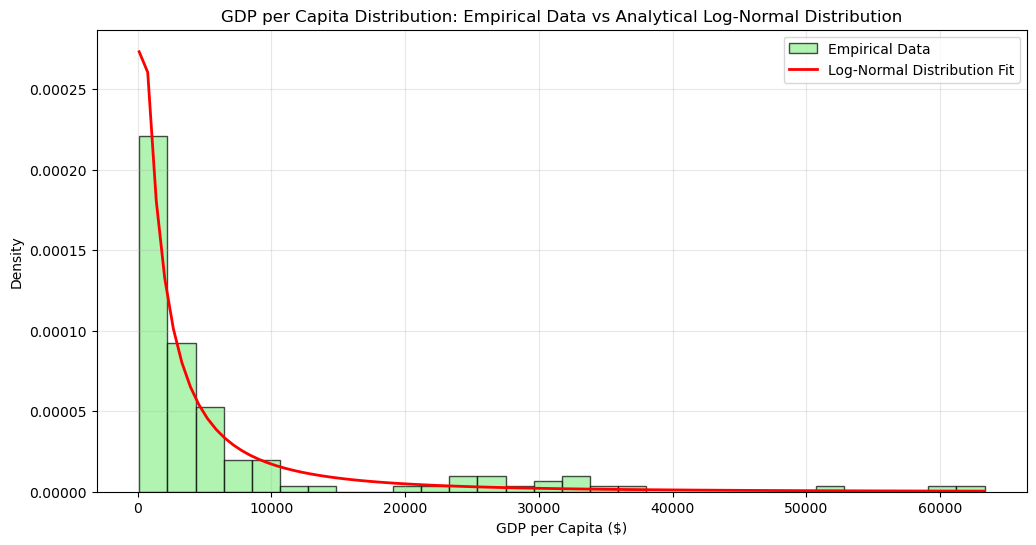

In [14]:
#Analytical for GDP/capita

print("\n=== PART 4: ANALYTICAL DISTRIBUTION FOR GDP PER CAPITA ===")

# Choose log-normal distribution for GDP per capita because:
# 1. Economic data (income, wealth) typically follows log-normal distribution
# 2. Cannot have negative values (log-normal is always positive)
# 3. Has a long right tail (few very rich countries, many poorer ones)
print("Distribution Choice: Log-Normal Distribution")
print("Reason: Economic variables like income and wealth typically follow log-normal distribution with positive skew")

# Get GDP per capita data and clean it
gdp_data = dfLE['GDP_per_capita'].dropna()  # Remove missing values
gdp_data = gdp_data[gdp_data > 0]  # Remove zeros and negative values (log requires positive)
print(f"GDP per capita data: {len(gdp_data)} countries with valid positive data")

# For log-normal distribution, we work with log-transformed data
# If X ~ LogNormal, then log(X) ~ Normal
log_gdp = np.log(gdp_data)

# Calculate parameters for log-normal distribution
# For log-normal, we need the mean and std of the log-transformed data
mu_log = log_gdp.mean()    # Mean of log(GDP)
sigma_log = log_gdp.std()  # Std of log(GDP)

print(f"Log(GDP per capita) Statistics:")
print(f"  Mean of log(GDP): {mu_log:.2f}")
print(f"  Std of log(GDP): {sigma_log:.2f}")
print(f"  Original GDP - Min: ${gdp_data.min():.2f}, Max: ${gdp_data.max():.2f}")

# Create analytical log-normal distribution
# ss.lognorm uses s=σ (shape parameter) and scale=exp(μ)
analytical_gdp = ss.lognorm(s=sigma_log, scale=np.exp(mu_log))

# Plot empirical vs analytical distributions
plt.figure(figsize=(12, 6))

# Plot empirical data
plt.hist(gdp_data, bins=30, density=True, alpha=0.7, 
         color='lightgreen', label='Empirical Data', edgecolor='black')

# Plot analytical PDF
x = np.linspace(gdp_data.min(), gdp_data.max(), 100)
plt.plot(x, analytical_gdp.pdf(x), 'r-', linewidth=2, label='Log-Normal Distribution Fit')

plt.xlabel('GDP per Capita ($)')
plt.ylabel('Density')
plt.title('GDP per Capita Distribution: Empirical Data vs Analytical Log-Normal Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()





### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>


=== PART 5: CORRELATION ANALYSIS WITH OUTLIER HANDLING ===
Country counts: 32 developed, 159 developing

Applying outlier filters to improve correlation analysis:
Rationale: Extreme outliers can disproportionately influence correlation coefficients
Filters applied:
1. GDP_per_capita > 0 (remove invalid/negative economic data)
2. Lifeexpectancy between 30-90 years (biologically plausible range)
3. AdultMortality < 500 (extreme values likely data errors)
4. Population > 1000 (remove microstates with extreme per capita values)
After filtering: 26 developed, 116 developing countries

Analyzing correlations for: ['Lifeexpectancy', 'GDP_per_capita', 'Schooling', 'BMI', 'AdultMortality', 'Alcohol']


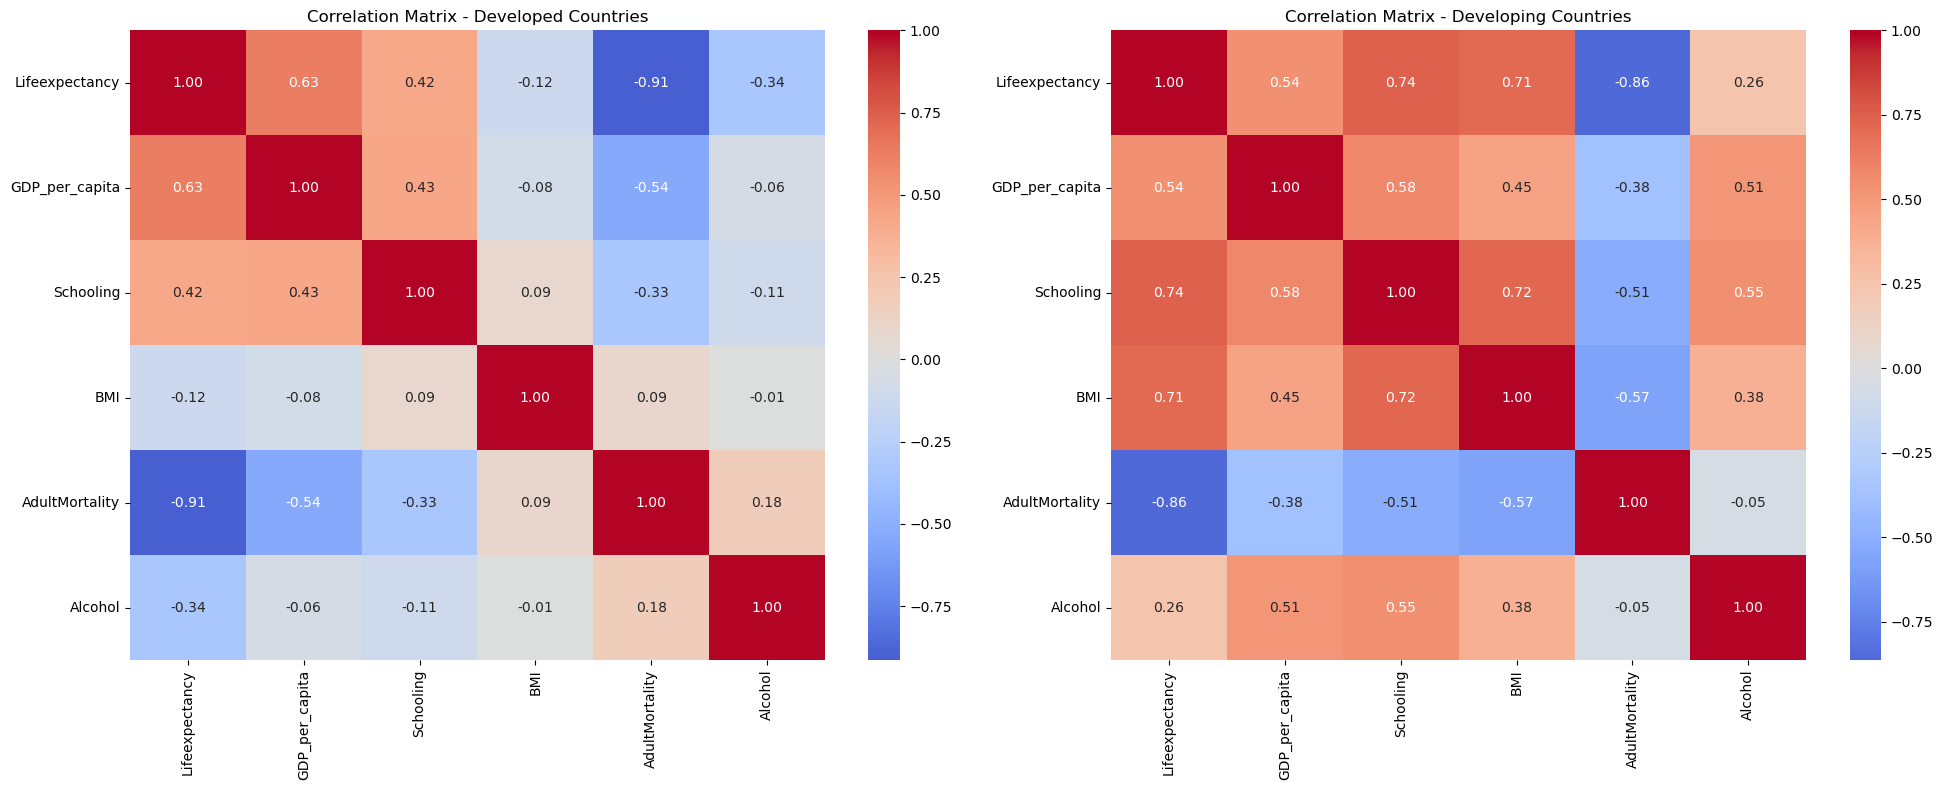


Creating scatter plots to visualize relationships...


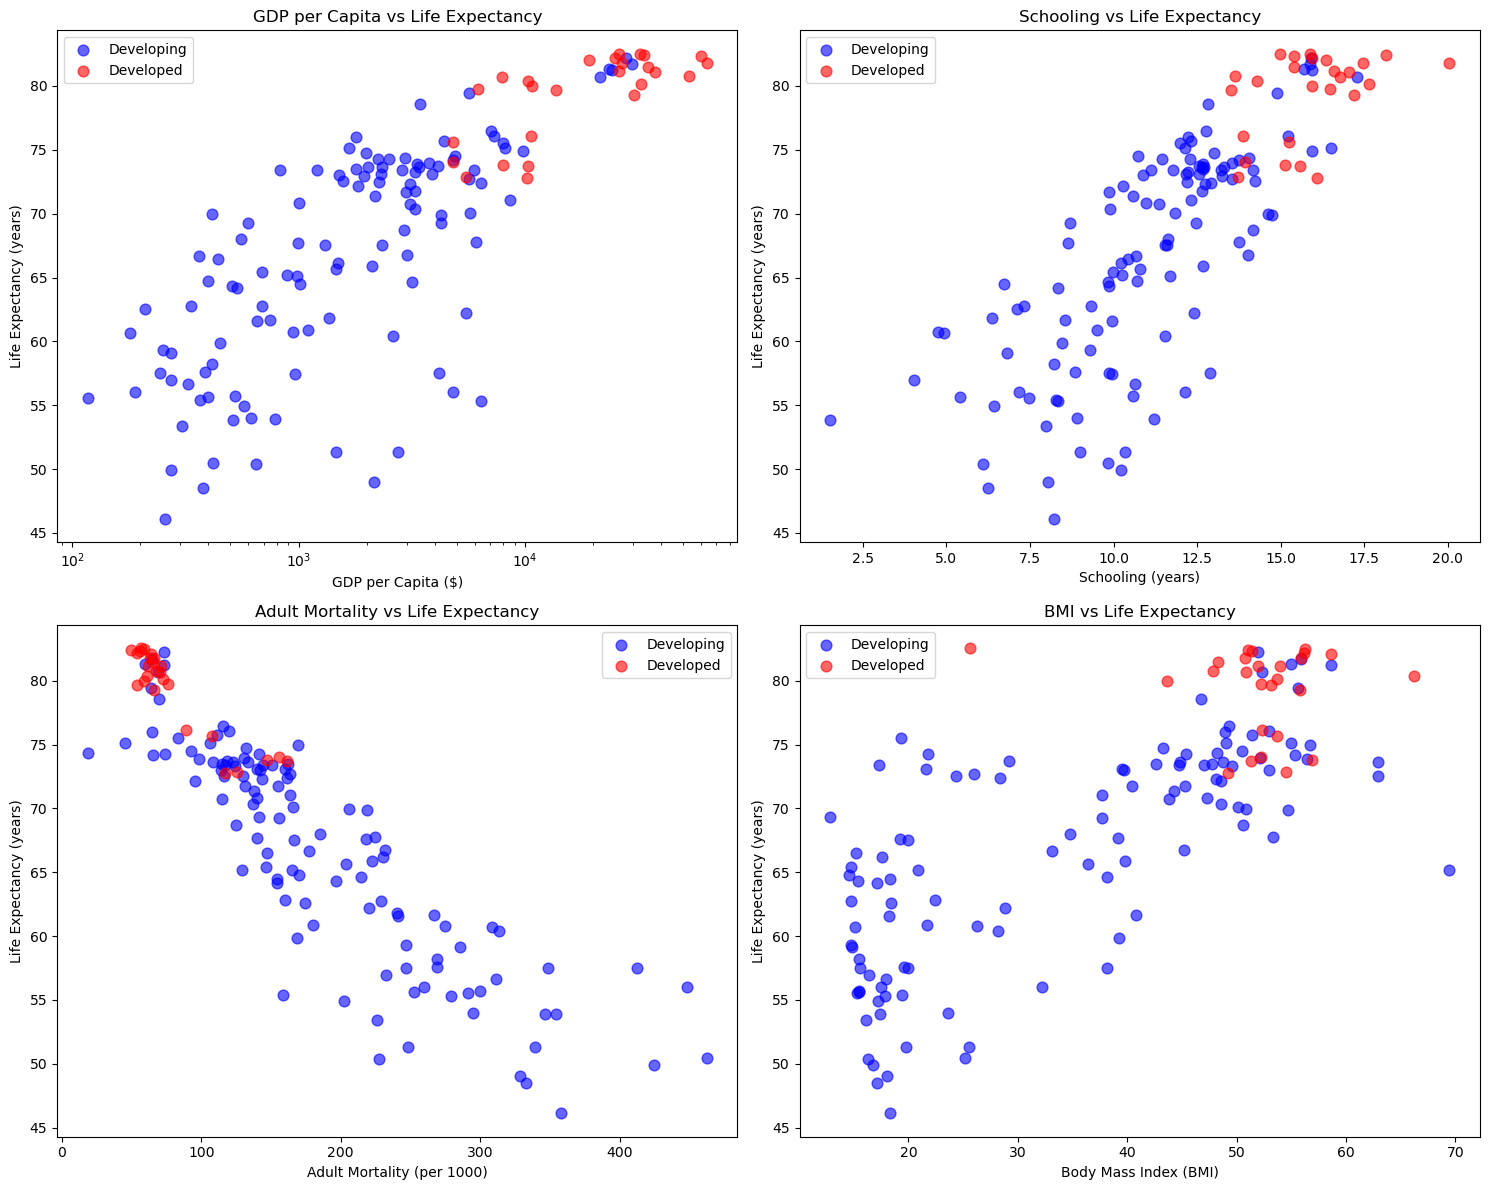

In [8]:
#Visualize correlations. 

print("\n=== PART 5: CORRELATION ANALYSIS WITH OUTLIER HANDLING ===")

# Separate developed and developing countries for comparison
# This lets us see if relationships are different between these groups
developed = dfLE[dfLE['isDeveloped'] == 1]
developing = dfLE[dfLE['isDeveloped'] == 0]

print(f"Country counts: {len(developed)} developed, {len(developing)} developing")

# Remove outliers that could distort correlation analysis
print("\nApplying outlier filters to improve correlation analysis:")
print("Rationale: Extreme outliers can disproportionately influence correlation coefficients")

# Define reasonable filters based on domain knowledge:
filters = (
    (dfLE['GDP_per_capita'] > 0) &           # Valid economic data
    (dfLE['Lifeexpectancy'] > 30) &          # Biologically plausible minimum
    (dfLE['Lifeexpectancy'] < 90) &          # Biologically plausible maximum  
    (dfLE['AdultMortality'] < 500) &         # Extreme values likely errors
    (dfLE['Population'] > 1000)              # Remove microstates with extreme per capita values
)

print("Filters applied:")
print("1. GDP_per_capita > 0 (remove invalid/negative economic data)")
print("2. Lifeexpectancy between 30-90 years (biologically plausible range)")
print("3. AdultMortality < 500 (extreme values likely data errors)")
print("4. Population > 1000 (remove microstates with extreme per capita values)")

# Apply filters
dfLE_filtered = dfLE[filters]
developed_filtered = dfLE_filtered[dfLE_filtered['isDeveloped'] == 1]
developing_filtered = dfLE_filtered[dfLE_filtered['isDeveloped'] == 0]

print(f"After filtering: {len(developed_filtered)} developed, {len(developing_filtered)} developing countries")

# Select key variables for correlation analysis
# Choosing variables that theoretically should relate to life expectancy
key_vars = ['Lifeexpectancy', 'GDP_per_capita', 'Schooling', 'BMI', 'AdultMortality', 'Alcohol']
print(f"\nAnalyzing correlations for: {key_vars}")

# Create correlation heatmaps for easy comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Developed countries correlation heatmap
corr_developed = developed_filtered[key_vars].corr()
# sns.heatmap creates a colored grid where color intensity shows correlation strength
sns.heatmap(corr_developed, annot=True, cmap='coolwarm', center=0, ax=ax1, fmt='.2f')
# annot=True shows correlation values in each cell
# cmap='coolwarm' uses blue for negative, red for positive correlations
# center=0 sets white color at correlation=0
ax1.set_title('Correlation Matrix - Developed Countries')

# Developing countries correlation heatmap
corr_developing = developing_filtered[key_vars].corr()
sns.heatmap(corr_developing, annot=True, cmap='coolwarm', center=0, ax=ax2, fmt='.2f')
ax2.set_title('Correlation Matrix - Developing Countries')

plt.tight_layout()
plt.show()

# Create scatter plots to visualize key relationships
print("\nCreating scatter plots to visualize relationships...")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: GDP vs Life Expectancy
axes[0,0].scatter(developing_filtered['GDP_per_capita'], developing_filtered['Lifeexpectancy'], 
                 alpha=0.6, label='Developing', color='blue', s=60)
axes[0,0].scatter(developed_filtered['GDP_per_capita'], developed_filtered['Lifeexpectancy'], 
                 alpha=0.6, label='Developed', color='red', s=60)
axes[0,0].set_xlabel('GDP per Capita ($)')
axes[0,0].set_ylabel('Life Expectancy (years)')
axes[0,0].set_title('GDP per Capita vs Life Expectancy')
axes[0,0].legend()
axes[0,0].set_xscale('log')  # Use log scale because GDP has huge range
# Log scale makes exponential relationships appear linear

# Plot 2: Schooling vs Life Expectancy
axes[0,1].scatter(developing_filtered['Schooling'], developing_filtered['Lifeexpectancy'], 
                 alpha=0.6, label='Developing', color='blue', s=60)
axes[0,1].scatter(developed_filtered['Schooling'], developed_filtered['Lifeexpectancy'], 
                 alpha=0.6, label='Developed', color='red', s=60)
axes[0,1].set_xlabel('Schooling (years)')
axes[0,1].set_ylabel('Life Expectancy (years)')
axes[0,1].set_title('Schooling vs Life Expectancy')
axes[0,1].legend()

# Plot 3: Adult Mortality vs Life Expectancy
axes[1,0].scatter(developing_filtered['AdultMortality'], developing_filtered['Lifeexpectancy'], 
                 alpha=0.6, label='Developing', color='blue', s=60)
axes[1,0].scatter(developed_filtered['AdultMortality'], developed_filtered['Lifeexpectancy'], 
                 alpha=0.6, label='Developed', color='red', s=60)
axes[1,0].set_xlabel('Adult Mortality (per 1000)')
axes[1,0].set_ylabel('Life Expectancy (years)')
axes[1,0].set_title('Adult Mortality vs Life Expectancy')
axes[1,0].legend()

# Plot 4: BMI vs Life Expectancy
axes[1,1].scatter(developing_filtered['BMI'], developing_filtered['Lifeexpectancy'], 
                 alpha=0.6, label='Developing', color='blue', s=60)
axes[1,1].scatter(developed_filtered['BMI'], developed_filtered['Lifeexpectancy'], 
                 alpha=0.6, label='Developed', color='red', s=60)
axes[1,1].set_xlabel('Body Mass Index (BMI)')
axes[1,1].set_ylabel('Life Expectancy (years)')
axes[1,1].set_title('BMI vs Life Expectancy')
axes[1,1].legend()

plt.tight_layout()
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 


=== PART 6: CORRELATION CALCULATIONS AND ANALYSIS ===
Calculating top correlations with Life Expectancy...
Columns in developed_filtered: ['Country', 'isDeveloped', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDP_per_capita']
Columns in developing_filtered: ['Country', 'isDeveloped', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDP_per_capita']

Numeric columns in developed: ['isDeveloped', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDP_per_capita']
Numeric columns in developing: ['isDeveloped', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeath

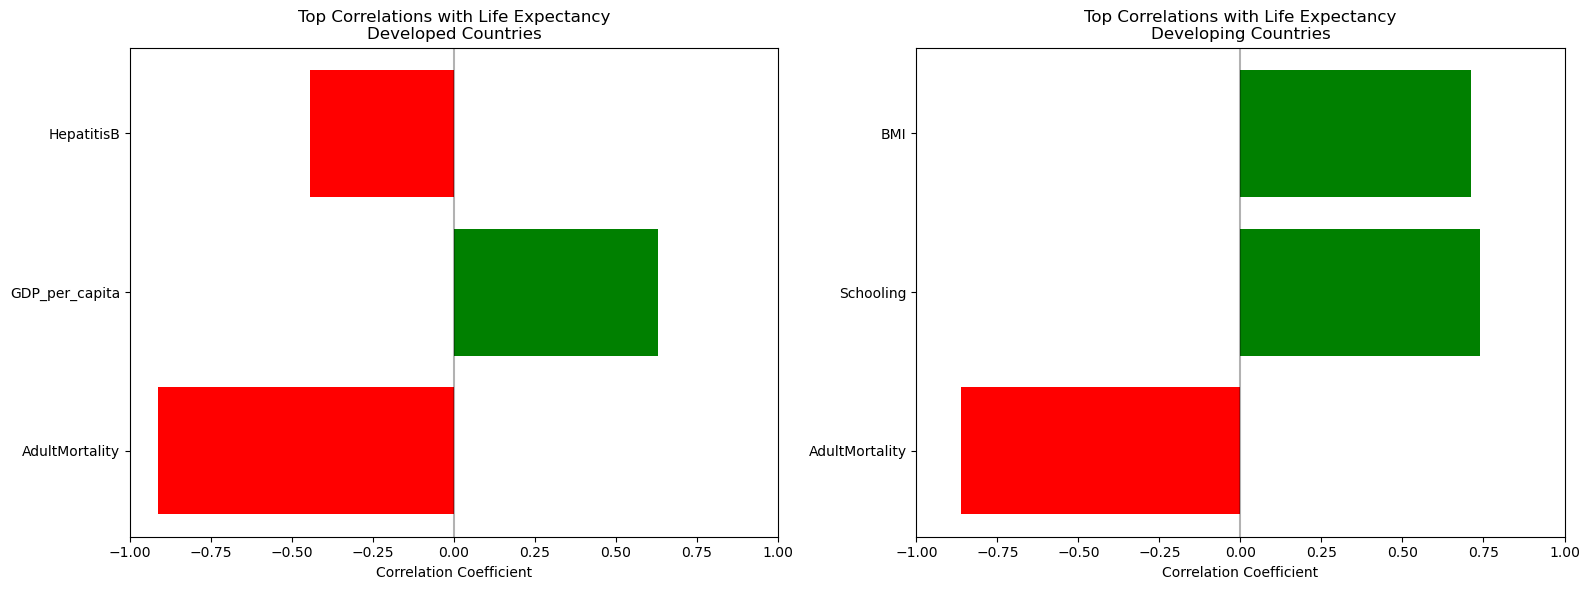

In [12]:
# Part 6: Calculate correlations and analyze (25pts)

print("\n=== PART 6: CORRELATION CALCULATIONS AND ANALYSIS ===")

# Function to get top correlations with life expectancy
def get_top_correlations(data, target_var, n=3):
    """
    Calculate top n absolute correlations with target variable
    
    Parameters:
    data: DataFrame containing the data
    target_var: string name of target variable (e.g., 'Lifeexpectancy')
    n: number of top correlations to return
    
    Returns:
    Series with top n absolute correlations (excluding target itself)
    """
    # Select only numeric columns for correlation calculation
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Check if target variable exists in numeric data
    if target_var not in numeric_data.columns:
        raise ValueError(f"Target variable '{target_var}' not found in numeric columns")
    
    # Calculate correlation matrix using only numeric data
    corr_matrix = numeric_data.corr()
    
    # Get correlations with target variable, take absolute values, sort descending
    correlations = corr_matrix[target_var].abs().sort_values(ascending=False)
    
    # Remove target variable itself and isDeveloped (if present)
    to_remove = [target_var, 'isDeveloped']
    correlations = correlations.drop(to_remove, errors='ignore')
    
    # Return top n correlations
    return correlations.head(n)

print("Calculating top correlations with Life Expectancy...")

# First, let's check what columns we have in our filtered datasets
print(f"Columns in developed_filtered: {list(developed_filtered.columns)}")
print(f"Columns in developing_filtered: {list(developing_filtered.columns)}")

# Check which columns are numeric
numeric_cols_developed = developed_filtered.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_developing = developing_filtered.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nNumeric columns in developed: {numeric_cols_developed}")
print(f"Numeric columns in developing: {numeric_cols_developing}")

# Calculate correlations separately for each group
try:
    # Top correlations for developed countries
    top_developed = get_top_correlations(developed_filtered, 'Lifeexpectancy')
    print("\n Top 3 ABSOLUTE correlations with Life Expectancy - DEVELOPED countries:")
    print(top_developed)
    
    # Top correlations for developing countries  
    top_developing = get_top_correlations(developing_filtered, 'Lifeexpectancy')
    print("\n Top 3 ABSOLUTE correlations with Life Expectancy - DEVELOPING countries:")
    print(top_developing)
    
    # Now get actual correlation values (not absolute) to see direction
    developed_numeric = developed_filtered.select_dtypes(include=[np.number])
    developing_numeric = developing_filtered.select_dtypes(include=[np.number])
    
    developed_corrs = developed_numeric.corr()['Lifeexpectancy'].drop(['Lifeexpectancy', 'isDeveloped'], errors='ignore')
    developing_corrs = developing_numeric.corr()['Lifeexpectancy'].drop(['Lifeexpectancy', 'isDeveloped'], errors='ignore')
    
    print("\n ACTUAL correlation values (showing direction):")
    print("\nDeveloped countries:")
    for var in top_developed.index:
        if var in developed_corrs:
            corr_value = developed_corrs[var]
            direction = "positive" if corr_value > 0 else "negative"
            strength = "strong" if abs(corr_value) > 0.7 else "moderate" if abs(corr_value) > 0.3 else "weak"
            print(f"  {var}: {corr_value:.3f} ({strength} {direction})")
    
    print("\nDeveloping countries:")
    for var in top_developing.index:
        if var in developing_corrs:
            corr_value = developing_corrs[var]
            direction = "positive" if corr_value > 0 else "negative"
            strength = "strong" if abs(corr_value) > 0.7 else "moderate" if abs(corr_value) > 0.3 else "weak"
            print(f"  {var}: {corr_value:.3f} ({strength} {direction})")
            
except Exception as e:
    print(f" Error calculating correlations: {e}")
    print("Troubleshooting: Checking for NaN values and data types...")
    
    # Debug information
    print(f"Developed countries shape: {developed_filtered.shape}")
    print(f"Developing countries shape: {developing_filtered.shape}")
    print(f"NaN values in developed Lifeexpectancy: {developed_filtered['Lifeexpectancy'].isna().sum()}")
    print(f"NaN values in developing Lifeexpectancy: {developing_filtered['Lifeexpectancy'].isna().sum()}")

# Additional analysis: Compare specific relationships
print("\n" + "="*60)
print(" COMPARATIVE ANALYSIS")
print("="*60)

# Calculate specific correlations of interest
variables_to_compare = ['GDP_per_capita', 'Schooling', 'AdultMortality', 'BMI', 'Alcohol']

print("\nComparison of specific correlations:")
print(f"{'Variable':<15} {'Developed':<10} {'Developing':<10} {'Difference':<10}")
print("-" * 50)

for var in variables_to_compare:
    if var in developed_numeric.columns and var in developing_numeric.columns:
        dev_corr = developed_numeric.corr().loc['Lifeexpectancy', var]
        dev_corr = 0 if pd.isna(dev_corr) else dev_corr
        
        dev_corr = developing_numeric.corr().loc['Lifeexpectancy', var]
        dev_corr = 0 if pd.isna(dev_corr) else dev_corr
        
        diff = abs(dev_corr) - abs(dev_corr)
        print(f"{var:<15} {dev_corr:>8.3f}   {dev_corr:>8.3f}   {diff:>8.3f}")

# Create a summary visualization of the top correlations
print("\n CREATING CORRELATION SUMMARY VISUALIZATION...")

# Get the top variables from both groups
top_vars_combined = list(set(list(top_developed.index) + list(top_developing.index)))

if top_vars_combined:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Developed countries correlations
    dev_corrs = []
    dev_labels = []
    for var in top_developed.index[:5]:  # Top 5
        if var in developed_corrs:
            dev_corrs.append(developed_corrs[var])
            dev_labels.append(var)
    
    axes[0].barh(dev_labels, dev_corrs, color=['green' if x > 0 else 'red' for x in dev_corrs])
    axes[0].set_xlim(-1, 1)
    axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[0].set_title('Top Correlations with Life Expectancy\nDeveloped Countries')
    axes[0].set_xlabel('Correlation Coefficient')
    
    # Developing countries correlations
    dev_corrs = []
    dev_labels = []
    for var in top_developing.index[:5]:  # Top 5
        if var in developing_corrs:
            dev_corrs.append(developing_corrs[var])
            dev_labels.append(var)
    
    axes[1].barh(dev_labels, dev_corrs, color=['green' if x > 0 else 'red' for x in dev_corrs])
    axes[1].set_xlim(-1, 1)
    axes[1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[1].set_title('Top Correlations with Life Expectancy\nDeveloping Countries')
    axes[1].set_xlabel('Correlation Coefficient')
    
    plt.tight_layout()
    plt.show()
else:
    print("No top variables found for visualization")


